# Lab 2 - Jorge

## Exploración de los datos

1. En el fichero datosSAN2018.zip encontrar ́as un fichero csv para cada d ́ıa con cada una
de las negociaciones que se realizaron, con la fecha, el precio y el volumen negociado.
Carga todos los ficheros y ju ́ntalos en un u ́nico DataFrame de pandas con el que
trabajaremos durante toda la pr ́actica.

In [2]:
import pandas as pd
import zipfile
import os

# Nombre del archivo ZIP
zip_filename = "/Users/jorgegarcelan/Desktop/UNI/5-MASTER IAA/SC3/IA FINANZAS/IAA-Finance/Labs/Lab 2/data/datosSAN2018.zip"

# Verificar si el archivo ZIP existe
if not os.path.exists(zip_filename):
    raise FileNotFoundError(f"El archivo {zip_filename} no se encuentra en la ruta especificada.")

# Lista para almacenar los DataFrames
dfs = []

try:
    # Extraer los archivos y procesarlos
    with zipfile.ZipFile(zip_filename, 'r') as z:
        # Obtener la lista de archivos dentro del ZIP
        file_list = z.namelist()

        # Iterar sobre cada archivo CSV dentro del ZIP
        for file in file_list:
            if file.endswith(".csv"):  # Asegurar que es un archivo CSV
                with z.open(file) as f:
                    df = pd.read_csv(f)  # Leer el CSV en un DataFrame
                    dfs.append(df)

    # Concatenar todos los DataFrames en uno solo
    df_final = pd.concat(dfs, ignore_index=True)

except zipfile.BadZipFile:
    raise zipfile.BadZipFile("El archivo no es un ZIP válido o está corrupto.")


In [3]:
df

,TIME,VOLUMEN,PRECIO
0,2018-09-27 09:00:16.000,11,4.453
1,2018-09-27 09:00:16.000,1,4.453
2,2018-09-27 09:00:16.000,6,4.453
3,2018-09-27 09:00:16.000,10,4.453
4,2018-09-27 09:00:16.000,133,4.453
...,...,...,...
13279,2018-09-27 17:35:11.000,1659,4.481
13280,2018-09-27 17:35:11.000,76775,4.481
13281,2018-09-27 17:35:11.000,1722,4.481
13282,2018-09-27 17:35:11.000,60418,4.481


2. Usando los datos del apartado anterior calcula las velas (open, high, low, close, vol)
diarias y mensuales.

In [4]:
df_final["TIME"] = pd.to_datetime(df_final["TIME"])  # Convertir a datetime
df_final.set_index("TIME", inplace=True)  # Usar la columna de tiempo como índice

def calcular_velas(df, intervalo):
    return df.resample(intervalo).agg({
        "PRECIO": ["first", "last", "max", "min"]
    }).dropna()

# Calcular las velas diarias y mensuales
df_velas_diarias = calcular_velas(df_final, "1D")
df_velas_mensuales = calcular_velas(df_final, "1M")

# Renombrar columnas
df_velas_diarias.columns = ["Open", "Close", "High", "Low"]
df_velas_mensuales.columns = ["Open", "Close", "High", "Low"]

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_75335/516581706.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df.resample(intervalo).agg({


In [5]:
df_velas_diarias

,Open,Close,High,Low
TIME,,,,
2018-01-02,5.5270,5.4540,5.5400,5.4350
2018-01-03,5.4800,5.4550,5.4800,5.4220
2018-01-04,5.4800,5.6380,5.6440,5.4740
2018-01-05,5.6600,5.6750,5.7290,5.6340
2018-01-08,5.6940,5.6920,5.7340,5.6650
...,...,...,...,...
2018-12-21,3.9600,3.9305,3.9955,3.8815
2018-12-24,3.9000,3.8915,3.9275,3.8745
2018-12-27,3.9575,3.8620,3.9600,3.8000


In [6]:
df_velas_mensuales

,Open,Close,High,Low
TIME,,,,
2018-01-31,5.5270,5.9830,6.0930,5.4220
2018-02-28,6.0600,5.6670,6.0630,5.4060
2018-03-31,5.6400,5.2950,5.6460,5.1350
2018-04-30,5.2600,5.3730,5.5740,5.1050
2018-05-31,5.3590,4.6000,5.5370,4.5385
2018-06-30,4.6840,4.5920,4.8965,4.5000
2018-07-31,4.5320,4.8195,4.8580,4.4535
2018-08-31,4.8260,4.2880,4.8420,4.2555
2018-09-30,4.2875,4.3355,4.6360,4.1400


3. Haz un gráfico de velas diarias y mensuales.

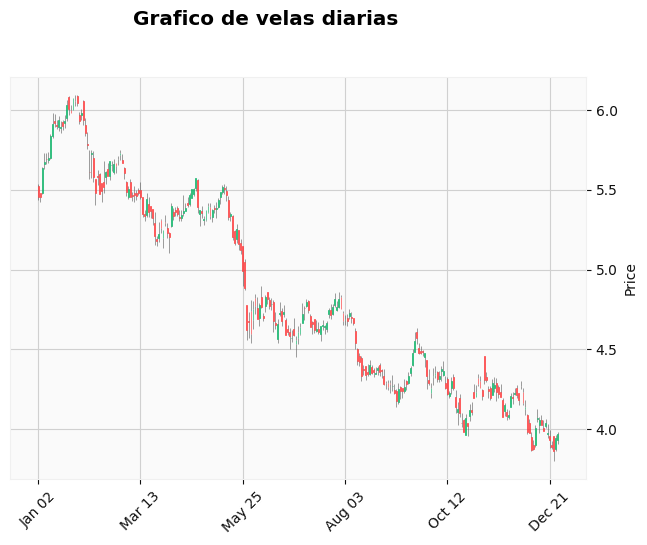

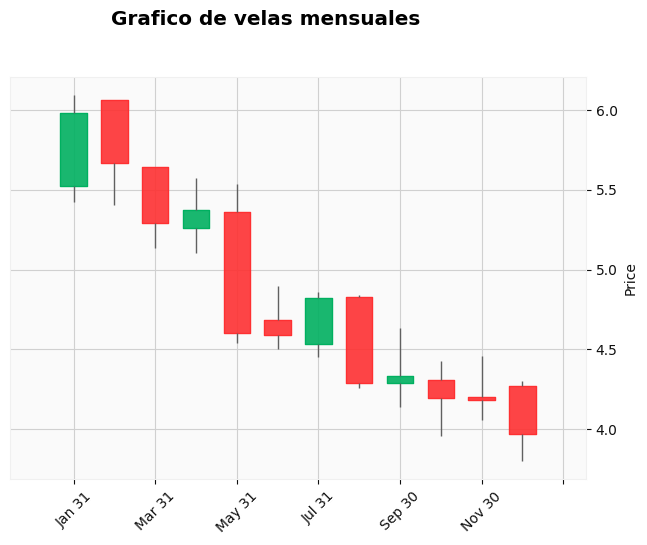

In [7]:
import mplfinance as mpf

mpf.plot(df_velas_diarias, type='candle', style='yahoo', title="Grafico de velas diarias")

mpf.plot(df_velas_mensuales, type='candle', style='yahoo', title="Grafico de velas mensuales")

4. Para un día elegido por ti, calcula el precio ponderado por volumen (VWAP) desde el
inicio del día, en cada instante de tiempo.

In [9]:
# Elegir un día específico (modifica la fecha según tus datos)
fecha_elegida = "2018-11-26"  # Formato YYYY-MM-DD

# Filtrar los datos para la fecha elegida
df_dia = df_final[df_final.index.date == pd.to_datetime(fecha_elegida).date()].copy()

# Asegurar que la columna "VOLUMEN" existe y no tiene valores nulos
if "VOLUMEN" not in df_dia.columns or df_dia["VOLUMEN"].isna().all():
    raise ValueError("La columna 'VOLUMEN' no está presente o tiene solo valores nulos.")

# Calcular el precio ponderado por volumen (VWAP)
df_dia["CUM_VOL"] = df_dia["VOLUMEN"].cumsum()
df_dia["CUM_PRECIO_VOL"] = (df_dia["PRECIO"] * df_dia["VOLUMEN"]).cumsum()
df_dia["VWAP"] = df_dia["CUM_PRECIO_VOL"] / df_dia["CUM_VOL"]
df_dia


,VOLUMEN,PRECIO,CUM_VOL,CUM_PRECIO_VOL,VWAP
TIME,,,,,
2018-11-26 09:00:08,140,4.1425,140,5.799500e+02,4.142500
2018-11-26 09:00:08,100,4.1425,240,9.942000e+02,4.142500
2018-11-26 09:00:08,760,4.1425,1000,4.142500e+03,4.142500
2018-11-26 09:00:08,500,4.1425,1500,6.213750e+03,4.142500
2018-11-26 09:00:08,1223,4.1425,2723,1.128003e+04,4.142500
...,...,...,...,...,...
2018-11-26 17:35:02,1833,4.2055,36267679,1.523335e+08,4.200255
2018-11-26 17:35:02,6240,4.2055,36273919,1.523598e+08,4.200256
2018-11-26 17:35:02,36951,4.2055,36310870,1.525152e+08,4.200262


5. Obtén una gráfico parecido a la Figura 1: donde puedas ver las negociaciones, el VWAP
y volumen acumulado a lo largo del día. ¿Qué conclusiones puedes extraer?

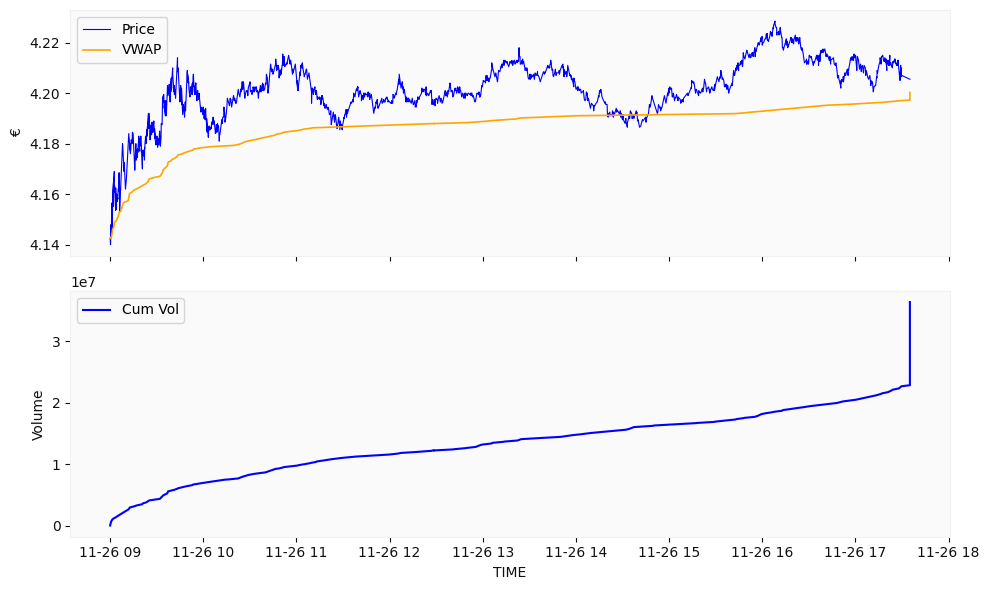

In [10]:
import matplotlib.pyplot as plt

# Crear la figura y los subgráficos
fig, ax1 = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Gráfico superior: Precio y VWAP
ax1[0].plot(df_dia.index, df_dia["PRECIO"], label="Price", color="blue", linewidth=0.8)
ax1[0].plot(df_dia.index, df_dia["VWAP"], label="VWAP", color="orange", linewidth=1.2)
ax1[0].set_ylabel("€")
ax1[0].legend()
ax1[0].grid()

# Gráfico inferior: Volumen acumulado
ax1[1].plot(df_dia.index, df_dia["CUM_VOL"], label="Cum Vol", color="blue")
ax1[1].set_ylabel("Volume")
ax1[1].set_xlabel("TIME")
ax1[1].legend()
ax1[1].grid()

# Mostrar la figura
plt.tight_layout()
plt.show()


El gráfico muestra que el precio comienza subiendo, luego se estabiliza con fluctuaciones a lo largo del día, mientras que el VWAP sigue una línea más suave, reflejando el precio medio ponderado por volumen. Durante la mañana, el precio está por debajo del VWAP, indicando posibles oportunidades de compra, y más tarde oscila alrededor de él, sugiriendo un mercado equilibrado. El volumen acumulado aumenta de forma constante, con un pico al final del día, lo que sugiere mayor actividad de negociación en el cierre del mercado. Esto indica que muchos inversores ajustan sus posiciones al final del día.

## 2. Cálculo y estimación del volumen diario

1. Calcula para cada día el volumen negociado en intervalos de 30 minutos. Normalizaremos esta curva con el volumen total diario para obtener un porcentaje por cada intervalo. Realiza un gráfico para un día en concreto, obtendrás algo parecido a la Figura 2.

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_75335/557645693.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_volumen_30m = df_dia.resample("30T")["VOLUMEN"].sum()


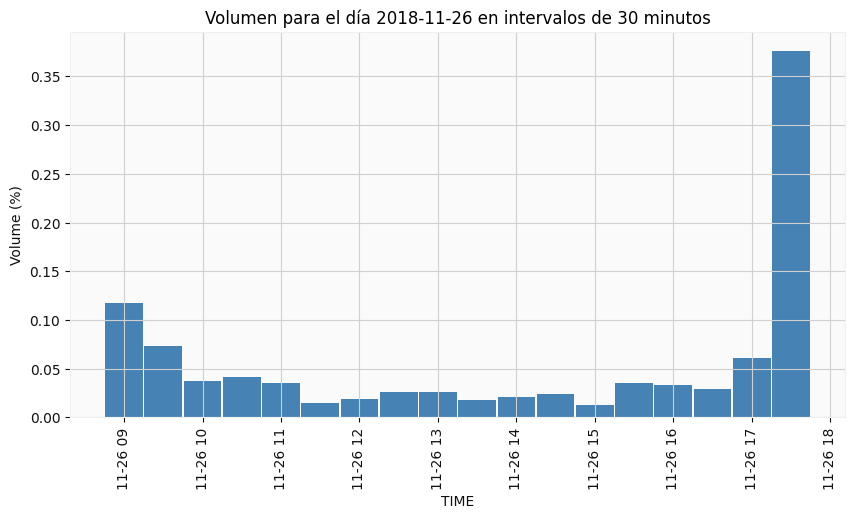

In [11]:
# Elegir un día específico
fecha_elegida = "2018-11-26"

# Filtrar los datos para la fecha elegida
df_dia = df_final[df_final.index.date == pd.to_datetime(fecha_elegida).date()].copy()

# Agrupar el volumen en intervalos de 30 minutos
df_volumen_30m = df_dia.resample("30T")["VOLUMEN"].sum()

# Normalizar dividiendo por el volumen total diario
df_volumen_30m /= df_volumen_30m.sum()

# Graficar los datos
plt.figure(figsize=(10, 5))
plt.bar(df_volumen_30m.index, df_volumen_30m, width=0.02, color="steelblue")

# Formato del gráfico
plt.xlabel("TIME")
plt.ylabel("Volume (%)")
plt.xticks(rotation=90)
plt.title(f"Volumen para el día {fecha_elegida} en intervalos de 30 minutos")

# Mostrar el gráfico
plt.show()


2. Calcula el volumen medio diario por intervalos de 30 minutos de todo el año, ¿qué conclusiones puedes extraer?

3. Realiza un modelo de regresión donde se estime para cada día el porcentaje de volumen de cada intervalo. Se tendrán en cuenta los siguientes puntos: